In [1]:
import os
data_dir = 'cell_images'
os.listdir(data_dir)

['test', 'train']

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from matplotlib.image import imread

In [4]:
test_path = 'cell_images/test/'
train_path = 'cell_images/train/'

In [5]:
test_path

'cell_images/test/'

In [6]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [7]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [8]:
# path =""
os.listdir(train_path+os.listdir(train_path)[0])[0]

'C92P53ThinF_IMG_20150821_150457_cell_111.png'

In [9]:
para_cell = train_path+'parasitized//'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'
para_cell

'cell_images/train/parasitized//C100P61ThinF_IMG_20150918_144104_cell_162.png'

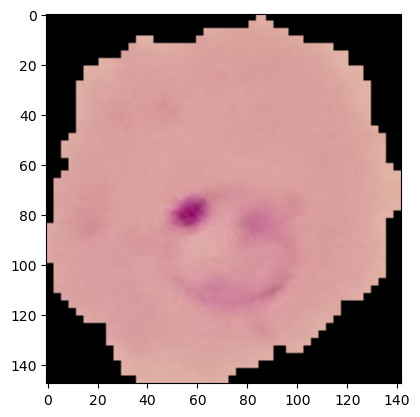

In [10]:
plt.imshow(imread(para_cell))

In [11]:
os.listdir(train_path+'uninfected')[0]

'C92P53ThinF_IMG_20150821_150457_cell_111.png'

In [12]:
uninfected_cell = train_path+'uninfected//'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'
uninfected_cell

'cell_images/train/uninfected//C100P61ThinF_IMG_20150918_144104_cell_128.png'

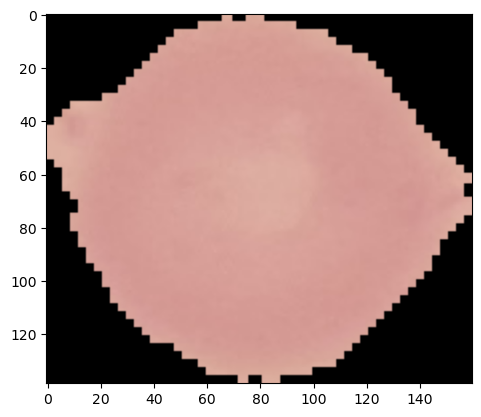

In [13]:
plt.imshow(imread(uninfected_cell))

In [14]:
len(os.listdir(test_path+'parasitized'))

1300

In [15]:
len(os.listdir(test_path+'uninfected'))

1300

In [16]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected//'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [17]:
# sns.jointplot(dim1,dim2)

In [18]:
np.mean(dim1)

130.92538461538462

In [19]:
np.mean(dim2)

130.75

In [20]:
image_shape = (130,130,3)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-07-06 23:28:17.107177: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-06 23:28:17.108611: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 23:28:17.133971: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-06 23:28:17.134425: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 23:28:17.574864: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [22]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range = 0.1,
                              shear_range = 0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

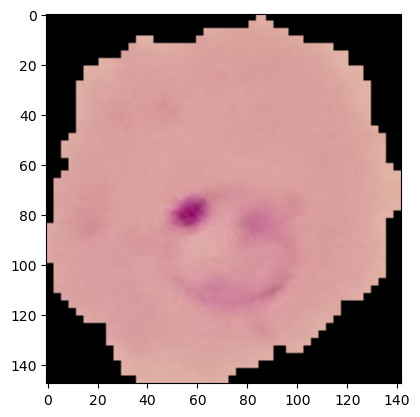

In [23]:
para_img = imread(para_cell)
plt.imshow(para_img)

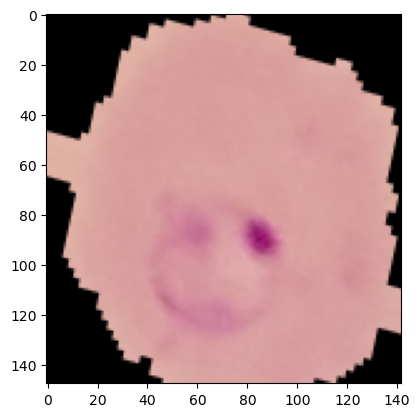

In [24]:
plt.imshow(image_gen.random_transform(para_img))
# para_img

In [25]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [26]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [93]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model
#Define the input shape
input_shape = image_shape
input_layer = Input(shape=image_shape)

# Convolutional layers
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', name = 'conv1')(input_layer)
x = MaxPooling2D(pool_size=(2, 2), name= 'pool1')(x)

x = Conv2D(filters=9, kernel_size=(3, 3), activation='relu', name = 'conv2')(x)
x = MaxPooling2D(pool_size=(2, 2) , name ='pool2')(x)

x = Conv2D(filters=1, kernel_size=(3, 3), activation='relu', name = 'conv3')(x)
x = MaxPooling2D(pool_size=(2, 2), name = 'pool3')(x)

# Flatten the output
x = Flatten()(x)

# Fully connected layers
x = Dense(13, activation='relu', name = 'dense')(x)
x = Dropout(0.5)(x)

output = Dense(1, activation='sigmoid', name ='output')(x)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print the summary
model.summary()
######################################################################################
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.regularizers import l1
 
# from tensorflow.keras.layers import Activation
# from qkeras.qlayers import QDense, QActivation
# from qkeras.quantizers import quantized_bits, quantized_relu
# model = Sequential()
# model.add(
#     QConv2D(
#         filters=12,
#         kernel_size=(3, 3),
#         activation=quantized_relu(6),
#         name='conv1',
#         input_shape=image_shape,
#         kernel_quantizer=quantized_bits(6, 0, alpha=1),
#         bias_quantizer=quantized_bits(6, 0, alpha=1),
#     )
# )
# model.add(MaxPooling2D(pool_size=(2, 2), name='pool1'))
# model.add(
#     QConv2D(
#         filters=10,
#         kernel_size=(3, 3),
#         activation=quantized_relu(6),
#         name='conv2',
#         kernel_quantizer=quantized_bits(6, 0, alpha=1),
#         bias_quantizer=quantized_bits(6, 0, alpha=1),
#     )
# )
# model.add(MaxPooling2D(pool_size=(2, 2), name='pool2'))
# model.add(
#     QConv2D(
#         filters=14,
#         kernel_size=(3, 3),
#         activation=quantized_relu(6),
#         name='conv3',
#         kernel_quantizer=quantized_bits(6, 0, alpha=1),
#         bias_quantizer=quantized_bits(6, 0, alpha=1),
#     )
# )
# model.add(MaxPooling2D(pool_size=(2, 2), name='pool3'))
# model.add(Flatten())
# model.add(
#     QDense(
#         units=20,
#         activation=quantized_relu(6),
#         name='dense',
#         kernel_quantizer=quantized_bits(6, 0, alpha=1),
#         bias_quantizer=quantized_bits(6, 0, alpha=1),
#     )
# )
# model.add(Dropout(0.9))
# model.add(
#     QDense(
#         units=1,
#         activation='sigmoid',
#         name='output',
#         kernel_quantizer=quantized_bits(6, 0, alpha=1),
#         bias_quantizer=quantized_bits(6, 0, alpha=1),
#     )
# )

# model.compile(
#     loss='binary_crossentropy',
#     optimizer=Adam(),
#     metrics=['accuracy']
# )

# model.summary()




####################
# model = Sequential()
# model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Flatten())

# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(1,activation='sigmoid'))

# model.compile(loss='binary_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])


Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 130, 130, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      896       
                                                                 
 pool1 (MaxPooling2D)        (None, 64, 64, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 62, 62, 9)         2601      
                                                                 
 pool2 (MaxPooling2D)        (None, 31, 31, 9)         0         
                                                                 
 conv3 (Conv2D)              (None, 29, 29, 1)         82        
                                                                 
 pool3 (MaxPooling2D)        (None, 14, 14, 1)         0  

In [94]:
model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 130, 130, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      896       
                                                                 
 pool1 (MaxPooling2D)        (None, 64, 64, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 62, 62, 9)         2601      
                                                                 
 pool2 (MaxPooling2D)        (None, 31, 31, 9)         0         
                                                                 
 conv3 (Conv2D)              (None, 29, 29, 1)         82        
                                                                 
 pool3 (MaxPooling2D)        (None, 14, 14, 1)         0  

In [95]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_los',patience=2)

In [96]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],
                                               color_mode = 'rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')
test_image_gen =  image_gen.flow_from_directory(test_path,target_size=image_shape[:2],
                                               color_mode = 'rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [97]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [99]:
results = model.fit_generator(train_image_gen,
                             epochs = 10,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])
from tensorflow.keras.models import load_model
# model = load_model('malaria_detector.h5')

Epoch 1/10
   2/1560 [..............................] - ETA: 1:25 - loss: 0.6931 - accuracy: 0.5000

/tmp/ipykernel_211376/2113544301.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,
2023-07-07 00:38:03.955695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1559/1560 [============================>.] - ETA: 0s - loss: 0.6932 - accuracy: 0.4985

2023-07-07 00:39:26.452541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1560/1560 [==============================] - 89s 57ms/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
1560/1560 [==============================] - 88s 56ms/step - loss: 0.6932 - accuracy: 0.4962 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
1560/1560 [==============================] - 89s 57ms/step - loss: 0.6932 - accuracy: 0.4958 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
1560/1560 [==============================] - 93s 59ms/step - loss: 0.6932 - accuracy: 0.4941 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
1560/1560 [==============================] - 124s 79ms/step - loss: 0.6932 - accuracy: 0.4968 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
1560/1560 [==============================] - 108s 69ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
1560/1560 [==============================] - 114s 73ms/step - loss: 0.6932 - accuracy: 0.4928 - val_loss: 0.6932 - val_acc

In [100]:
model.evaluate_generator(test_image_gen)

/tmp/ipykernel_211376/4011314882.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)
2023-07-07 01:28:28.535325: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


[0.6931465268135071, 0.5]

In [101]:
model.metrics_names

['loss', 'accuracy']

In [102]:
pred = model.predict_generator(test_image_gen)

/tmp/ipykernel_211376/2032896581.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_image_gen)
2023-07-07 01:28:40.097775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


In [103]:
pred

array([[0.50047284],
       [0.50047284],
       [0.50047284],
       ...,
       [0.50047284],
       [0.50047284],
       [0.50047284]], dtype=float32)

In [104]:
predictions = pred > 0.7

In [105]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [106]:
len(pred)

2600

In [107]:
from sklearn.metrics import classification_report,confusion_matrix
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [108]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1300
           1       0.00      0.00      0.00      1300

    accuracy                           0.50      2600
   macro avg       0.25      0.50      0.33      2600
weighted avg       0.25      0.50      0.33      2600



/home/ayush/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ayush/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ayush/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

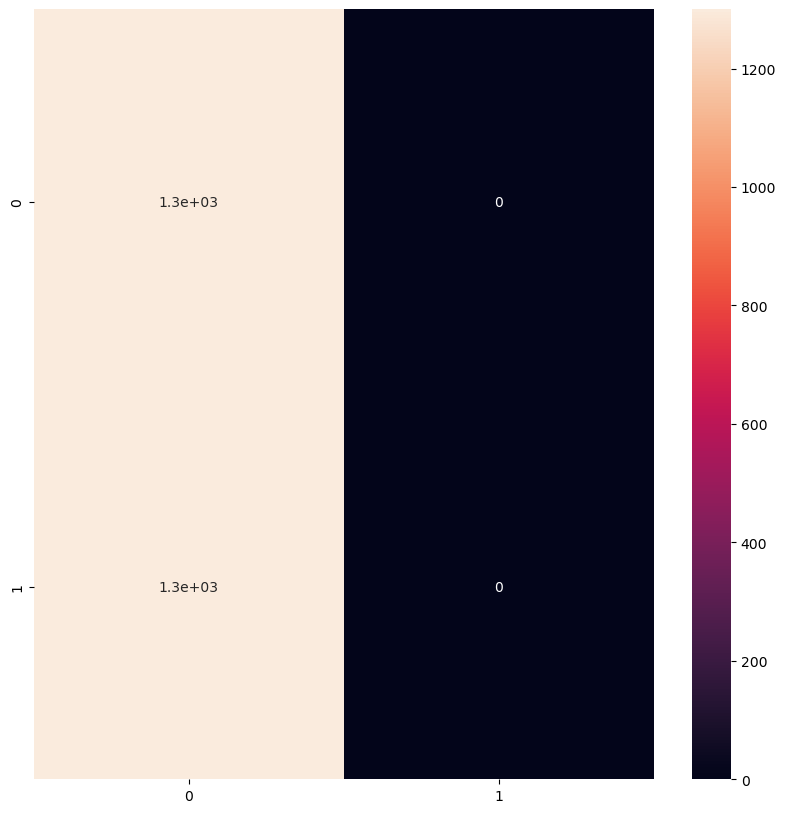

In [109]:
confusion_matrix(test_image_gen.classes,predictions)
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(test_image_gen.classes,predictions),annot=True)

In [110]:
from tensorflow.keras.preprocessing import image
my_image = image.load_img(para_cell,target_size=image_shape)

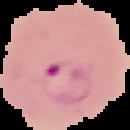

In [111]:
my_image

In [112]:
model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 130, 130, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      896       
                                                                 
 pool1 (MaxPooling2D)        (None, 64, 64, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 62, 62, 9)         2601      
                                                                 
 pool2 (MaxPooling2D)        (None, 31, 31, 9)         0         
                                                                 
 conv3 (Conv2D)              (None, 29, 29, 1)         82        
                                                                 
 pool3 (MaxPooling2D)        (None, 14, 14, 1)         0  

In [113]:
img_array = image.img_to_array(my_image)
img_array.shape

(130, 130, 3)

In [114]:
img_array = np.expand_dims(img_array,axis=0)
model.predict(img_array)

1/1 [==============================] - 0s 48ms/step


array([[0.50047284]], dtype=float32)

In [123]:
 
import hls4ml
 
hls_config = hls4ml.utils.config_from_keras_model(model, granularity='name')
hls_config['Model']['ReuseFactor'] = 2458
hls_config['LayerName']['conv1']['Strategy'] = 'Latency'
hls_config['LayerName']['conv2']['Strategy'] = 'Latency'
 
hls_config['LayerName']['pool1']['Strategy'] = 'Latency'
hls_config['LayerName']['pool2']['Strategy'] = 'Latency'
 

hls_config['Model']['Precision'] = 'ap_fixed<6,2>'
hls_config['LayerName']['output']['Strategy'] = 'Stable'
#plotting.print_dict(hls_config_aq)
hls_config['Flows'] = ['vivado:fifo_depth_optimization']
hls4ml.model.optimizer.get_optimizer('vivado:fifo_depth_optimization').configure(profiling_fifo_depth=100)


cfg = hls4ml.converters.create_config(backend='Vivado')
cfg['IOType'] = 'io_stream'  # Must set this if using CNNs!
cfg['HLSConfig'] = hls_config
cfg['KerasModel'] = model
cfg['OutputDir'] = 'normal_cnn/'
cfg['Part'] = 'xczu7ev-ffvc1156-2-e'

hls_model = hls4ml.converters.keras_to_hls(cfg)
 
 

print("----------------compilation starts-------------------")
hls_model.compile()
 
print("----------------compilation done-------------------")

 

Interpreting Model
Topology:
Layer name: input_18, layer type: InputLayer, input shapes: [[None, 130, 130, 3]], output shape: [None, 130, 130, 3]
Layer name: conv1, layer type: Conv2D, input shapes: [[None, 130, 130, 3]], output shape: [None, 128, 128, 32]
Layer name: pool1, layer type: MaxPooling2D, input shapes: [[None, 128, 128, 32]], output shape: [None, 64, 64, 32]
Layer name: conv2, layer type: Conv2D, input shapes: [[None, 64, 64, 32]], output shape: [None, 62, 62, 9]
Layer name: pool2, layer type: MaxPooling2D, input shapes: [[None, 62, 62, 9]], output shape: [None, 31, 31, 9]
Layer name: conv3, layer type: Conv2D, input shapes: [[None, 31, 31, 9]], output shape: [None, 29, 29, 1]
Layer name: pool3, layer type: MaxPooling2D, input shapes: [[None, 29, 29, 1]], output shape: [None, 14, 14, 1]
Layer name: flatten_17, layer type: Reshape, input shapes: [[None, 14, 14, 1]], output shape: [None, 196]
Layer name: dense, layer type: Dense, input shapes: [[None, 196]], output shape: [No

INFO: [XFORM 203-603] Inlining function 'nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>::operator[]' into 'nnet::shift_line_buffer<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>, config2>' (firmware/nnet_utils/nnet_conv_stream.h:237).
INFO: [XFORM 203-603] Inlining function 'nnet::kernel_shift_2d<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>, config2>' into 'nnet::shift_line_buffer<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>, config2>' (firmware/nnet_utils/nnet_conv_stream.h:252).
INFO: [XFORM 203-603] Inlining function 'nnet::product::mult<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0> >::product' into 'nnet::dense_resource_rf_leq_nin<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config8_mult>' (firmware/nnet_utils/nnet_dense_resource.h:56).
INFO: [XFORM 203-603] Inlining function 'nnet::product::mult<ap_fixed<16, 6, 

INFO: [HLS 200-111] Finished Standard Transforms Time (s): cpu = 00:00:27 ; elapsed = 00:00:28 . Memory (MB): peak = 940.773 ; gain = 525.676 ; free physical = 10831 ; free virtual = 111288
INFO: [HLS 200-10] Checking synthesizability ...
INFO: [HLS 200-111] Finished Checking Synthesizability Time (s): cpu = 00:00:28 ; elapsed = 00:00:29 . Memory (MB): peak = 940.773 ; gain = 525.676 ; free physical = 10824 ; free virtual = 111281
INFO: [XFORM 203-1101] Packing variable 'out_data.data.V' (firmware/nnet_utils/nnet_activation_stream.h:84) into a 16-bit variable.
INFO: [XFORM 203-1101] Packing variable 'out_data.data.V' (firmware/nnet_utils/nnet_activation_stream.h:45) into a 144-bit variable.
INFO: [XFORM 203-1101] Packing variable 'out_data.data.V' (firmware/nnet_utils/nnet_activation_stream.h:45) into a 512-bit variable.
INFO: [XFORM 203-1101] Packing variable 'out_data.data.V' (firmware/nnet_utils/nnet_activation_stream.h:45) into a 16-bit variable.
INFO: [XFORM 203-1101] Packing vari

INFO: [HLS 200-489] Unrolling loop 'LineBufferDataIn' (firmware/nnet_utils/nnet_conv_stream.h:241) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, config4>' completely with a factor of 32.
INFO: [HLS 200-489] Unrolling loop 'KernelShiftWidth' (firmware/nnet_utils/nnet_conv_stream.h:194) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, config4>' completely with a factor of 1.
INFO: [HLS 200-489] Unrolling loop 'KernelShiftHeight' (firmware/nnet_utils/nnet_conv_stream.h:197) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, config4>' completely with a factor of 2.
INFO: [HLS 200-489] Unrolling loop 'KernelShiftChannel' (firmware/nnet_utils/nnet_conv

INFO: [HLS 200-489] Unrolling loop 'ResetAccum' (firmware/nnet_utils/nnet_dense_latency.h:48) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, config2>' completely with a factor of 32.
INFO: [HLS 200-489] Unrolling loop 'Accum1' (firmware/nnet_utils/nnet_dense_latency.h:54) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, config2>' completely with a factor of 27.
INFO: [HLS 200-489] Unrolling loop 'Accum2' (firmware/nnet_utils/nnet_dense_latency.h:56) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, config2>' completely with a factor of 32.
INFO: [HLS 200-489] Unrolling loop 'Result' (firmware/nnet_utils/nnet_dense_latency.h:64) in function 'nnet::conv_2d_

INFO: [XFORM 203-101] Partitioning array 'pool_window.V' (firmware/nnet_utils/nnet_pooling_stream.h:178) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'kernel_data.V.5'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'shift_buffer.V' (firmware/nnet_utils/nnet_conv_stream.h:229) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'line_buffer.Array.V.4' in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'tmp.data.V.7' in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'pool_window.V' (firmware/nnet_utils/nnet_pooling_stream.h:178) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'kernel_data.V.4'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'shift_buffer.V' (firmware/nnet_utils/nnet_conv_stream.h:229) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'line_buffer.Array.V.3' in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning 

INFO: [XFORM 203-712] Applying dataflow to function 'myproject', detected/extracted 13 process function(s): 
	 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, config2>'
	 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, relu_config3>'
	 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, config4>'
	 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>, config5>'
	 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>, relu_config6>'
	 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>

INFO: [XFORM 203-531] Rewinding loop 'ReuseLoop' (firmware/nnet_utils/nnet_dense_resource.h:129) in function 'dense_wrapper<ap_fixed<16, 6, 5, 3, 0>, ap_fixed<16, 6, 5, 3, 0>, config12>'.
INFO: [HLS 200-111] Finished Architecture Synthesis Time (s): cpu = 00:02:57 ; elapsed = 00:03:00 . Memory (MB): peak = 7915.148 ; gain = 7500.051 ; free physical = 7687 ; free virtual = 108141
INFO: [HLS 200-10] Starting hardware synthesis ...
INFO: [HLS 200-10] Synthesizing 'myproject' ...


INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining loop 'ReadInputHeight_ReadInputWidth'.
INFO: [SCHED 204-61] Unable to satisfy pipeline directive: Unable to pipeline the region.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 183.13 seconds; current allocated memory: 560.723 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Starting global binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 8.29 seconds; current allocate

INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 0.11 seconds; current allocated memory: 701.872 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'dense_wrapper_ap_fixed_16_6_5_3_0_ap_fixed_16_6_5_3_0_config12_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining loop 'ReuseLoop'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 3.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 0.77 seconds; current allocated memory: 704.055 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...

INFO: [RTGEN 206-100] Finished creating RTL model for 'conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s'.
INFO: [HLS 200-111]  Elapsed time: 4.65 seconds; current allocated memory: 755.410 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'relu_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_32u_relu_config3_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'relu_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_32u_relu_config3_s'.
INFO: [HLS 200-111]  Elapsed time: 6.9 seconds; current allocated memory: 814.318 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SY

INFO: [RTGEN 206-100] Generating core module 'myproject_mux_42_6_1_1': 32 instance(s).
INFO: [RTGEN 206-100] Finished creating RTL model for 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s'.
INFO: [HLS 200-111]  Elapsed time: 1.15 seconds; current allocated memory: 824.822 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------


INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_buffer_Array_V_0_0' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_bufNgs' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_buffer_Array_V_1251_0' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_bufOgC' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_buffer_Array_V_0_1' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_bufPgM' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_buffer_Array_V_1251_1' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_bufQgW' due to the length limit 80
IN

INFO: [RTGEN 206-100] Finished creating RTL model for 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s'.
INFO: [HLS 200-111]  Elapsed time: 8.73 seconds; current allocated memory: 934.292 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'relu_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_relu_config6_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'relu_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_relu_config6_s'.
INFO: [HLS 200-111]  Elapsed time: 26.63 seconds; current allocated memory: 1.094 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'pooling2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_config7_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
IN

INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s_line_buffer_Array_V_2_0_0' to 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s_line_buffbYs' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s_line_buffer_Array_V_2_0_1' to 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s_line_buffbZs' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s_line_buffer_Array_V_2_0_2' to 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s_line_buffb0s' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s_line_buffer_Array_V_2_0_3' to 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s_line_buffb1s' due to the length limit 80
INFO

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'relu_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_1u_relu_config9_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'relu_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_1u_relu_config9_s'.
INFO: [HLS 200-111]  Elapsed time: 2.9 seconds; current allocated memory: 1.117 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'pooling2d_cl_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_1u_config10_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_1u_config10_s_line_buffer_Array_V_3_0_0' to 'pooling2d_cl_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_1u_config10_s_li

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_6_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_7_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_8_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_9_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_10_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_11_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_12_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_13_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_14_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_15_V_U(fifo_w16_d100_A)' using Block 

INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_V_data_27_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_V_data_28_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_V_data_29_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_V_data_30_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer4_out_V_data_31_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_V_data_0_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_V_data_1_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_V_data_2_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_V_data_3_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_V_data_4_V_U(fifo_w16_d100_A)' using Block R

INFO: [RTMG 210-285] Implementing FIFO 'start_for_sigmoid_array_array_ap_fixed_16_6_5_3_0_1u_sigmoid_config15_U0_U(start_for_sigmoid_array_array_ap_fixed_16_6_5_3_0_1u_sigmoid_config15_U0)' using Shift Registers.
INFO: [HLS 200-111] Finished generating all RTL models Time (s): cpu = 00:06:10 ; elapsed = 00:06:23 . Memory (MB): peak = 7915.148 ; gain = 7500.051 ; free physical = 7568 ; free virtual = 108088
INFO: [VHDL 208-304] Generating VHDL RTL for myproject.
INFO: [VLOG 209-307] Generating Verilog RTL for myproject.
***** C/RTL SYNTHESIS COMPLETED IN 0h6m11s *****
***** C/RTL SIMULATION *****
INFO: [HLS 200-10] Adding test bench file 'myproject_test.cpp' to the project
INFO: [COSIM 212-47] Using XSIM for RTL simulation.
INFO: [COSIM 212-14] Instrumenting C test bench ...
ERROR: [COSIM 212-346] C test bench instrumentation failed: Cannot determine C object for RTL port input_18_V_data_0_V.
ERROR: [COSIM 212-5] *** C/RTL co-simulation file generation failed. ***
command 'ap_source' re

FileNotFoundError: [Errno 2] No such file or directory: 'normal_cnn//myproject_prj/solution1/sim/verilog/fifo_opt.vcd'

In [124]:
hls_model.build(csim=False, synth=True, vsynth=True)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.2 (64-bit)
  **** SW Build 2708876 on Wed Nov  6 21:39:14 MST 2019
  **** IP Build 2700528 on Thu Nov  7 00:09:20 MST 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /home/ayush/vivado_2019/Vivado/2019.2/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/home/ayush/vivado_2019/Vivado/2019.2/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'ayush' on host 'binodssd' (Linux_x86_64 version 5.19.0-45-generic) on Fri Jul 07 02:37:16 IST 2023
INFO: [HLS 200-10] On os Ubuntu 22.04.2 LTS
INFO: [HLS 200-10] In directory '/home/ayush/lasthls4ml/malaria_tf/normal_cnn'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Opening project '/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'myproject_test.cpp' to the project
INFO: [HLS 200-10]

INFO: [XFORM 203-603] Inlining function 'nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>::operator[]' into 'nnet::shift_line_buffer<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>, config2>' (firmware/nnet_utils/nnet_conv_stream.h:237).
INFO: [XFORM 203-603] Inlining function 'nnet::kernel_shift_2d<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>, config2>' into 'nnet::shift_line_buffer<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>, config2>' (firmware/nnet_utils/nnet_conv_stream.h:252).
INFO: [XFORM 203-603] Inlining function 'nnet::product::mult<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0> >::product' into 'nnet::dense_resource_rf_leq_nin<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config8_mult>' (firmware/nnet_utils/nnet_dense_resource.h:56).
INFO: [XFORM 203-603] Inlining function 'nnet::product::mult<ap_fixed<16, 6, 

INFO: [HLS 200-111] Finished Standard Transforms Time (s): cpu = 00:00:16 ; elapsed = 00:00:17 . Memory (MB): peak = 940.773 ; gain = 525.676 ; free physical = 10782 ; free virtual = 111250
INFO: [HLS 200-10] Checking synthesizability ...
INFO: [HLS 200-111] Finished Checking Synthesizability Time (s): cpu = 00:00:17 ; elapsed = 00:00:18 . Memory (MB): peak = 940.773 ; gain = 525.676 ; free physical = 10771 ; free virtual = 111239
INFO: [XFORM 203-1101] Packing variable 'out_data.data.V' (firmware/nnet_utils/nnet_activation_stream.h:84) into a 16-bit variable.
INFO: [XFORM 203-1101] Packing variable 'out_data.data.V' (firmware/nnet_utils/nnet_activation_stream.h:45) into a 144-bit variable.
INFO: [XFORM 203-1101] Packing variable 'out_data.data.V' (firmware/nnet_utils/nnet_activation_stream.h:45) into a 512-bit variable.
INFO: [XFORM 203-1101] Packing variable 'out_data.data.V' (firmware/nnet_utils/nnet_activation_stream.h:45) into a 16-bit variable.
INFO: [XFORM 203-1101] Packing vari

INFO: [HLS 200-489] Unrolling loop 'PoolLoop' (firmware/nnet_utils/nnet_pooling_stream.h:198) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, config4>' completely with a factor of 4.
INFO: [HLS 200-489] Unrolling loop 'KernelShiftWidth' (firmware/nnet_utils/nnet_conv_stream.h:194) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, config10>' completely with a factor of 1.
INFO: [HLS 200-489] Unrolling loop 'KernelShiftHeight' (firmware/nnet_utils/nnet_conv_stream.h:197) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, config10>' completely with a factor of 2.
INFO: [HLS 200-489] Unrolling loop 'KernelPushHeight' (firmware/nnet_utils/nnet_conv_stream.h:

INFO: [HLS 200-489] Unrolling loop 'Product1' (firmware/nnet_utils/nnet_dense_latency.h:37) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>, config5>' completely with a factor of 288.
INFO: [HLS 200-489] Unrolling loop 'Product2' (firmware/nnet_utils/nnet_dense_latency.h:40) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>, config5>' completely with a factor of 9.
INFO: [HLS 200-489] Unrolling loop 'ResetAccum' (firmware/nnet_utils/nnet_dense_latency.h:48) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>, config5>' completely with a factor of 9.
INFO: [HLS 200-489] Unrolling loop 'Accum1' (firmware/nnet_utils/nnet_dense_latency.h:54) in function 'nnet::conv_

INFO: [XFORM 203-101] Partitioning array 'res_out.i.i'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'shift_buffer.V' (firmware/nnet_utils/nnet_conv_stream.h:229) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'b2.V'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'mult.V' (firmware/nnet_utils/nnet_dense_latency.h:17) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'acc.V' (firmware/nnet_utils/nnet_dense_latency.h:18) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'line_buffer.Array.V' in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'tmp.data.V.13' in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'kernel_data.V'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'res_out.i.i'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'shift_buffer.V' (firmware/nnet_utils/nnet_conv_stream.h:229) in dimension 1 comple

INFO: [XFORM 203-603] Inlining function 'aesl_mux_load.81i16P.i7' into 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, config8>' (firmware/nnet_utils/nnet_dense_resource.h:56->firmware/nnet_utils/nnet_dense_resource.h:253->firmware/nnet_utils/nnet_conv_stream.h:297->firmware/nnet_utils/nnet_conv2d_stream.h:87->firmware/nnet_utils/nnet_conv2d_stream.h:103).
INFO: [XFORM 203-11] Balancing expressions in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 9u>, config7>' (firmware/nnet_utils/nnet_pooling_stream.h:65:5)...3 expression(s) balanced.
INFO: [XFORM 203-11] Balancing expressions in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 32u>, config4>' (firmware/nnet_utils/nnet_poolin

INFO: [XFORM 203-531] Rewinding loop 'ReuseLoop' (firmware/nnet_utils/nnet_dense_resource.h:129) in function 'dense_wrapper<ap_fixed<16, 6, 5, 3, 0>, ap_fixed<16, 6, 5, 3, 0>, config12>'.
INFO: [HLS 200-111] Finished Architecture Synthesis Time (s): cpu = 00:02:46 ; elapsed = 00:02:49 . Memory (MB): peak = 7928.180 ; gain = 7513.082 ; free physical = 7576 ; free virtual = 108069
INFO: [HLS 200-10] Starting hardware synthesis ...
INFO: [HLS 200-10] Synthesizing 'myproject' ...
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining loop 'ReadInputHeight_ReadInputWidth'.
INFO: [SCHED 204-61] Unable to satisfy pipeline directive: Unable to pipeline the region.
INFO: [SCHED 204-11] Finished s

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'pooling2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_config7_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining loop 'ReadInputHeight_ReadInputWidth'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 3.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 0.16 seconds; current allocated memory: 682.535 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 0.32 seconds; current allocated memory: 683.834 MB.
INFO: [HLS 200-10] ------------------

INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 0.07 seconds; current allocated memory: 716.802 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'myproject' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 0.2 seconds; current allocated memory: 717.764 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architec

INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_V_4_0_0' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_hbi' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_V_4_0_1' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_ibs' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_V_4_0_2' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_jbC' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_V_4_0_3' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s_line_buffer_Array_kbM' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 

INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_buffer_Array_V_0_0' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_bufNgs' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_buffer_Array_V_1251_0' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_bufOgC' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_buffer_Array_V_0_1' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_bufPgM' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_buffer_Array_V_1251_1' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_bufQgW' due to the length limit 80
IN

INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_buffer_Array_V_0_8' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_buf3i2' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_buffer_Array_V_1251_8' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_buf4jc' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_buffer_Array_V_0_9' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_buf5jm' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_buffer_Array_V_1251_9' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_buf6jw' due to the length limit 80
IN

INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_buffer_Array_V_1251_31' to 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s_line_bufbOq' due to the length limit 80
INFO: [RTGEN 206-100] Finished creating RTL model for 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s'.
INFO: [HLS 200-111]  Elapsed time: 8.52 seconds; current allocated memory: 933.678 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'relu_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_relu_config6_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'relu_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_relu_config6_s'.
INFO: [HLS 200-111]  Elapsed time: 26.91 seconds; current allocated memory: 1.093 GB.
INFO: [HLS 200-10] --------------------

INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s_line_buffer_Array_V_2_0_0' to 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s_line_buffbYs' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s_line_buffer_Array_V_2_0_1' to 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s_line_buffbZs' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s_line_buffer_Array_V_2_0_2' to 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s_line_buffb0s' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s_line_buffer_Array_V_2_0_3' to 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s_line_buffb1s' due to the length limit 80
INFO

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'relu_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_1u_relu_config9_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'relu_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_1u_relu_config9_s'.
INFO: [HLS 200-111]  Elapsed time: 2.94 seconds; current allocated memory: 1.117 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'pooling2d_cl_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_1u_config10_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_1u_config10_s_line_buffer_Array_V_3_0_0' to 'pooling2d_cl_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_1u_config10_s_l

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_19_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_20_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_21_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_22_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_23_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_24_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_25_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_26_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_27_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_28_V_U(fifo_w16_d100_A)' using Bl

INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_V_data_6_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_V_data_7_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer5_out_V_data_8_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_0_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_1_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_2_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_3_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_4_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_5_V_U(fifo_w16_d100_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer6_out_V_data_6_V_U(fifo_w16_d100_A)' using Block RAMs.



****** Vivado v2019.2 (64-bit)
  **** SW Build 2708876 on Wed Nov  6 21:39:14 MST 2019
  **** IP Build 2700528 on Thu Nov  7 00:09:20 MST 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source vivado_synth.tcl
# set tcldir [file dirname [info script]]
# source [file join $tcldir project.tcl]
## variable project_name
## set project_name "myproject"
## variable backend
## set backend "vivado"
## variable part
## set part "xczu7ev-ffvc1156-2-e"
## variable clock_period
## set clock_period 5
## variable clock_uncertainty
## set clock_uncertainty 12.5%
# add_files ${project_name}_prj/solution1/syn/vhdl
# synth_design -top ${project_name} -part $part
Command: synth_design -top myproject -part xczu7ev-ffvc1156-2-e
Starting synth_design
Attempting to get a license for feature 'Synthesis' and/or device 'xczu7ev'
INFO: [Common 17-349] Got license for feature 'Synthesis' and/or device 'xczu7ev'
INFO: Launching helper process for spawning children vivado processes
INFO: Helper 

INFO: [Synth 8-256] done synthesizing module 'conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s' (6#1) [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s.vhd:132]
INFO: [Synth 8-3491] module 'relu_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_32u_relu_config3_s' declared at '/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/relu_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_32u_relu_config3_s.vhd:12' bound to instance 'relu_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_32u_relu_config3_U0' of component 'relu_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_32u_relu_config3_s' [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/myproject.vhd:2547]
INFO: [Synth 8-638] synthesizing module 'relu_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_32u_relu_config3_s' [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/

INFO: [Synth 8-256] done synthesizing module 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s' (11#1) [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_32u_config4_s.vhd:219]
INFO: [Synth 8-3491] module 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s' declared at '/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s.vhd:12' bound to instance 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_U0' of component 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s' [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/myproject.vhd:2957]
INFO: [Synth 8-638] synthesizing module 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s' [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl

INFO: [Synth 8-256] done synthesizing module 'conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s' (14#1) [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s.vhd:150]
INFO: [Synth 8-638] synthesizing module 'relu_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_relu_config6_s' [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/relu_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_relu_config6_s.vhd:81]
INFO: [Synth 8-256] done synthesizing module 'relu_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_relu_config6_s' (15#1) [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/relu_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_relu_config6_s.vhd:81]
INFO: [Synth 8-638] synthesizing module 'pooling2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_9u_config7_s' [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/

INFO: [Synth 8-256] done synthesizing module 'conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s' (26#1) [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s.vhd:57]
INFO: [Synth 8-638] synthesizing module 'relu_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_1u_relu_config9_s' [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/relu_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_1u_relu_config9_s.vhd:33]
INFO: [Synth 8-256] done synthesizing module 'relu_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_1u_relu_config9_s' (27#1) [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/relu_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_1u_relu_config9_s.vhd:33]
INFO: [Synth 8-638] synthesizing module 'pooling2d_cl_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_1u_config10_s' [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/sy

INFO: [Synth 8-256] done synthesizing module 'dense_wrapper_ap_fixed_16_6_5_3_0_ap_fixed_16_6_5_3_0_config12_s' (39#1) [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/dense_wrapper_ap_fixed_16_6_5_3_0_ap_fixed_16_6_5_3_0_config12_s.vhd:232]
INFO: [Synth 8-256] done synthesizing module 'dense_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_13u_config12_s' (40#1) [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/dense_array_ap_fixed_1u_array_ap_fixed_16_6_5_3_0_13u_config12_s.vhd:69]
INFO: [Synth 8-638] synthesizing module 'relu_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_13u_relu_config13_s' [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/relu_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_13u_relu_config13_s.vhd:105]
INFO: [Synth 8-256] done synthesizing module 'relu_array_ap_fixed_13u_array_ap_fixed_16_6_5_3_0_13u_relu_config13_s' (41#1) [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/sol

INFO: [Synth 8-256] done synthesizing module 'start_for_sigmoid_array_array_ap_fixed_16_6_5_3_0_1u_sigmoid_config15_U0' (71#1) [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/start_for_sigmoid_array_array_ap_fixed_16_6_5_3_0_1u_sigmoid_config15_U0.vhd:66]
INFO: [Synth 8-256] done synthesizing module 'myproject' (72#1) [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/myproject.vhd:35]
---------------------------------------------------------------------------------
Finished Synthesize : Time (s): cpu = 00:00:13 ; elapsed = 00:00:14 . Memory (MB): peak = 2203.180 ; gain = 701.352 ; free physical = 6580 ; free virtual = 107123
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Finished Constraint Validation : Time (s): cpu = 00:00:14 ; elapsed = 00:00:16 . Memory (MB): peak = 2203.180 ; gain = 701.352 ; free physical 

INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-4490] FSM extraction disabled for register 'ap_CS_fsm_reg' through user attribute
INFO: [Synth 8-5818] HDL ADVISOR - The operator resource <adder> is shared. To prevent sharing consider applying a KEEP on the output of the operator [/home/ayush/lasthls4ml/malaria_tf/normal_cnn/myproject_prj/solution1/syn/vhdl/fifo_w16_d100_A.vhd:88]
INFO: [Synth 8-5779] Default cascade height of 1 will be used for BR

No constraint files found.
---------------------------------------------------------------------------------
Start Cross Boundary and Area Optimization
---------------------------------------------------------------------------------
DSP Report: Generating DSP grp_fu_2023_p2, operation Mode is: A*B.
DSP Report: operator grp_fu_2023_p2 is absorbed into DSP grp_fu_2023_p2.
INFO: [Synth 8-5779] Default cascade height of 1 will be used for BRAM '"layer5_out_V_data_1_V_U/mem_reg"'.
INFO: [Synth 8-7030] Implemented Non-Cascaded Block Ram (cascade_height = 1) of width 16 for RAM "layer5_out_V_data_1_V_U/mem_reg"
INFO: [Synth 8-5779] Default cascade height of 1 will be used for BRAM '"layer5_out_V_data_7_V_U/mem_reg"'.
INFO: [Synth 8-7030] Implemented Non-Cascaded Block Ram (cascade_height = 1) of width 16 for RAM "layer5_out_V_data_7_V_U/mem_reg"
INFO: [Synth 8-5779] Default cascade height of 1 will be used for BRAM '"layer5_out_V_data_3_V_U/mem_reg"'.
INFO: [Synth 8-7030] Implemented Non-Cas

INFO: [Synth 8-3886] merging instance 'i_1_0/sigmoid_array_array_ap_fixed_16_6_5_3_0_1u_sigmoid_config15_U0/regslice_both_res_V_data_V_U/ibuf_inst/ireg_reg[10]' (FDRE) to 'i_1_0/sigmoid_array_array_ap_fixed_16_6_5_3_0_1u_sigmoid_config15_U0/regslice_both_res_V_data_V_U/ibuf_inst/ireg_reg[15]'
INFO: [Synth 8-3886] merging instance 'i_1_0/sigmoid_array_array_ap_fixed_16_6_5_3_0_1u_sigmoid_config15_U0/regslice_both_res_V_data_V_U/ibuf_inst/ireg_reg[11]' (FDRE) to 'i_1_0/sigmoid_array_array_ap_fixed_16_6_5_3_0_1u_sigmoid_config15_U0/regslice_both_res_V_data_V_U/ibuf_inst/ireg_reg[15]'
INFO: [Synth 8-3886] merging instance 'i_1_0/sigmoid_array_array_ap_fixed_16_6_5_3_0_1u_sigmoid_config15_U0/regslice_both_res_V_data_V_U/ibuf_inst/ireg_reg[12]' (FDRE) to 'i_1_0/sigmoid_array_array_ap_fixed_16_6_5_3_0_1u_sigmoid_config15_U0/regslice_both_res_V_data_V_U/ibuf_inst/ireg_reg[15]'
INFO: [Synth 8-3886] merging instance 'i_1_0/sigmoid_array_array_ap_fixed_16_6_5_3_0_1u_sigmoid_config15_U0/regslice_b

INFO: [Synth 8-3333] propagating constant 0 across sequential element (ap_done_reg_reg)
DSP Report: Generating DSP grp_fu_1191_p2, operation Mode is: A*B.
DSP Report: operator grp_fu_1191_p2 is absorbed into DSP grp_fu_1191_p2.
DSP Report: Generating DSP grp_fu_2022_p2, operation Mode is: A*B.
DSP Report: operator grp_fu_2022_p2 is absorbed into DSP grp_fu_2022_p2.
DSP Report: Generating DSP myproject_mul_mul_9s_16s_22_1_1_U315/myproject_mul_mul_9s_16s_22_1_1_DSP48_1_U/p_cvt, operation Mode is: A2*B2.
DSP Report: register w12_V_U/dense_wrapper_ap_fixed_16_6_5_3_0_ap_fixed_16_6_5_3_0_config12_s_w12_V_rom_U/q0_reg is absorbed into DSP myproject_mul_mul_9s_16s_22_1_1_U315/myproject_mul_mul_9s_16s_22_1_1_DSP48_1_U/p_cvt.
DSP Report: register tmp_s_reg_9316_reg is absorbed into DSP myproject_mul_mul_9s_16s_22_1_1_U315/myproject_mul_mul_9s_16s_22_1_1_DSP48_1_U/p_cvt.
DSP Report: operator myproject_mul_mul_9s_16s_22_1_1_U315/myproject_mul_mul_9s_16s_22_1_1_DSP48_1_U/p_cvt is absorbed into DSP

---------------------------------------------------------------------------------
Start ROM, RAM, DSP and Shift Register Reporting
---------------------------------------------------------------------------------

ROM:
+-----------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------+---------------+----------------+
|Module Name                                                                  | RTL Object                                                                                                 | Depth x Width | Implemented As | 
+-----------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------+---------------+----------------+
|conv_2d_cl_array_ap_fixed_9u_array_ap_fixed_16_6_5_3_0_1u_config8_s_w8_V_rom | p_0_out                           


Report RTL Partitions: 
+------+---------------------------------------------------------------------------+------------+----------+
|      |RTL Partition                                                              |Replication |Instances |
+------+---------------------------------------------------------------------------+------------+----------+
|1     |conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s__GB0  |           1|     23333|
|2     |conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s__GB1  |           1|      8356|
|3     |conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s__GB2  |           1|      3550|
|4     |conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s__GB3  |           1|      4657|
|5     |conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_32u_config2_s__GB4  |           1|      5119|
|6     |conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_s__GB0  |           1|     4

INFO: [Synth 8-7053] The timing for the instance i_1_0/layer5_out_V_data_1_V_U/mem_reg_bram_0 (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the ram block. Providing additional output register may help in improving timing.
INFO: [Synth 8-7053] The timing for the instance i_1_0/layer5_out_V_data_7_V_U/mem_reg_bram_0 (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the ram block. Providing additional output register may help in improving timing.
INFO: [Synth 8-7053] The timing for the instance i_1_0/layer5_out_V_data_3_V_U/mem_reg_bram_0 (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the ram block. Providing additional output register may help in improving timing.
INFO: [Synth 8-7053] The timing for the instance i_1_0/layer5_out_V_data_4_V_U/mem_reg_bram_0 (implemented as a Block RAM) might be sub-optimal as no optional output 

INFO: [Synth 8-7053] The timing for the instance i_2/layer7_out_V_data_7_V_U/mem_reg_bram_0 (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the ram block. Providing additional output register may help in improving timing.
INFO: [Synth 8-7053] The timing for the instance i_2/layer7_out_V_data_6_V_U/mem_reg_bram_0 (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the ram block. Providing additional output register may help in improving timing.
INFO: [Synth 8-7053] The timing for the instance i_2/layer7_out_V_data_5_V_U/mem_reg_bram_0 (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the ram block. Providing additional output register may help in improving timing.
INFO: [Synth 8-7053] The timing for the instance i_2/layer7_out_V_data_4_V_U/mem_reg_bram_0 (implemented as a Block RAM) might be sub-optimal as no optional output register

---------------------------------------------------------------------------------
Start IO Insertion
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Start Flattening Before IO Insertion
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Finished Flattening Before IO Insertion
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Start Final Netlist Cleanup
---------------------------------------------------------------------------------
INFO: [Synth 8-5778] max_fanout handling on net conv_2d_cl_array_ap_fixed_32u_array_ap_fixed_16_6_5_3_0_9u_config5_U0_data_V_data_31_V_read is sub-optimal because some of its loads are not in same hierarchy as its driver

Synthesis Optimization Runtime : Time (s): cpu = 00:02:36 ; elapsed = 00:02:34 . Memory (MB): peak = 2958.781 ; gain = 1456.953 ; free physical = 6264 ; free virtual = 106540
Synthesis Optimization Complete : Time (s): cpu = 00:02:36 ; elapsed = 00:02:34 . Memory (MB): peak = 2958.781 ; gain = 1456.953 ; free physical = 6275 ; free virtual = 106537
INFO: [Project 1-571] Translating synthesized netlist
Netlist sorting complete. Time (s): cpu = 00:00:00.61 ; elapsed = 00:00:00.61 . Memory (MB): peak = 2958.781 ; gain = 0.000 ; free physical = 6205 ; free virtual = 106461
INFO: [Netlist 29-17] Analyzing 7565 Unisim elements for replacement
INFO: [Netlist 29-28] Unisim Transformation completed in 0 CPU seconds
INFO: [Project 1-570] Preparing netlist for logic optimization
INFO: [Opt 31-138] Pushed 0 inverter(s) to 0 load pin(s).
Netlist sorting complete. Time (s): cpu = 00:00:00.02 ; elapsed = 00:00:00.01 . Memory (MB): peak = 3048.441 ; gain = 0.000 ; free physical = 6122 ; free virtual =

{'CSimResults': [['0.5']],
 'CSynthesisReport': {'TargetClockPeriod': '5.00',
  'EstimatedClockPeriod': '4.156',
  'BestLatency': '8808327',
  'WorstLatency': '8808328',
  'IntervalMin': '104750',
  'IntervalMax': '8804902',
  'BRAM_18K': '157',
  'DSP': '6',
  'FF': '56603',
  'LUT': '120132',
  'URAM': '0',
  'AvailableBRAM_18K': '624',
  'AvailableDSP': '1728',
  'AvailableFF': '460800',
  'AvailableLUT': '230400',
  'AvailableURAM': '96'},
 'VivadoSynthReport': {'LUT': '62558',
  'FF': '45284',
  'BRAM_18K': '77.5',
  'URAM': '0',
  'DSP48E': '6'},
 'CosimReport': {'RTL': 'Verilog',
  'Status': 'Fail',
  'LatencyMin': 'NA',
  'LatencyMax': 'NA',
  'IntervalMin': 'NA',
  'IntervalMax': 'NA'}}